In [3]:
pip install tabulate


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Connected to database: car_sales.db
Table 'cars' created (if it didn't exist).
Data loaded from 'C:\Users\shant\OneDrive\Desktop\Intern\Task7\Data\car_prices.csv' into 'cars' table.
Revenue by Make (Top 10):
| make          | total_revenue   |
|:--------------|:----------------|
| Ford          | 1.3603e+09      |
| Chevrolet     | 7.21003e+08     |
| Nissan        | 6.33273e+08     |
| Toyota        | 4.88393e+08     |
| BMW           | 4.44255e+08     |
| Mercedes-Benz | 3.70084e+08     |
| Dodge         | 3.44138e+08     |
| Infiniti      | 3.12489e+08     |
| Honda         | 2.97645e+08     |
| Lexus         | 2.40615e+08     |


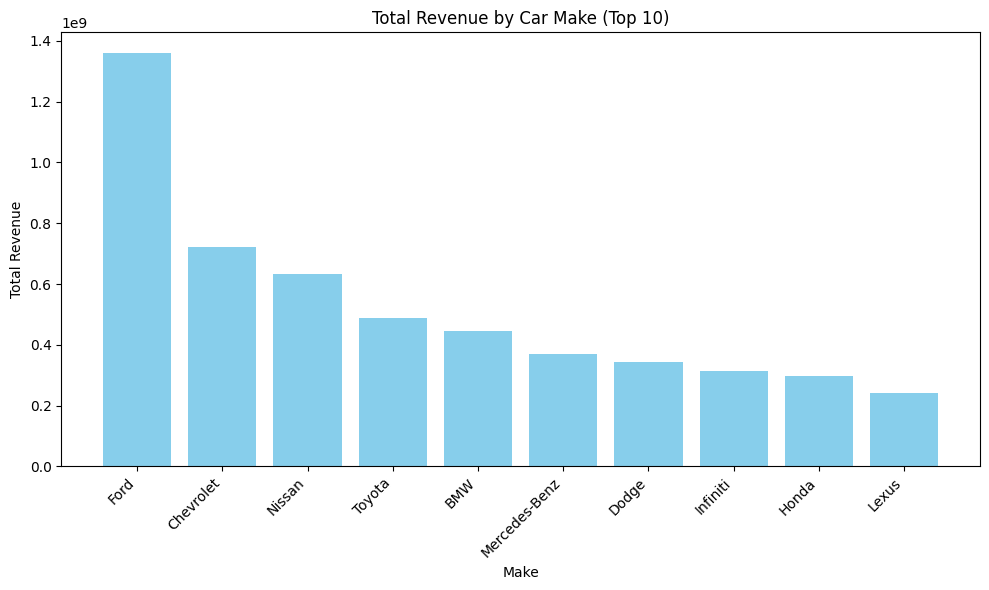

Connection to database: car_sales.db closed.


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

class CarSalesAnalyzer:
    def __init__(self, db_name="car_sales.db"):
        """
        Initializes the CarSalesAnalyzer with the database name.
        """
        self.db_name = db_name
        self.conn = None
        self.cursor = None

    def connect_db(self):
        """
        Connects to the SQLite database.
        """
        try:
            self.conn = sqlite3.connect(self.db_name)
            self.cursor = self.conn.cursor()
            print(f"Connected to database: {self.db_name}")
        except sqlite3.Error as e:
            print(f"Error connecting to database: {e}")
            raise

    def close_db(self):
        """
        Closes the database connection.
        """
        if self.conn:
            self.conn.close()
            print(f"Connection to database: {self.db_name} closed.")

    def create_table(self):
        """
        Creates the 'cars' table in the database.
        """
        try:
            self.cursor.execute('''
            CREATE TABLE IF NOT EXISTS cars (
                make TEXT,
                model TEXT,
                sellingprice REAL
            )
            ''')
            self.conn.commit()
            print("Table 'cars' created (if it didn't exist).")
        except sqlite3.Error as e:
            print(f"Error creating table: {e}")
            raise

    def load_data(self, csv_file = r"C:\Users\shant\OneDrive\Desktop\Intern\Task7\Data\car_prices.csv"):
        """
        Loads data from the CSV file into the 'cars' table.

        Args:
            csv_file (str, optional): Path to the CSV file. Defaults to "car_prices.csv".
        """
        try:
            df = pd.read_csv(csv_file)
            df[['make', 'model', 'sellingprice']].to_sql('cars', self.conn, if_exists='replace', index=False)
            print(f"Data loaded from '{csv_file}' into 'cars' table.")
        except (sqlite3.Error, FileNotFoundError, ValueError) as e:
            print(f"Error loading data: {e}")
            raise

    def get_revenue_by_make(self):
        """
        Calculates the total revenue for each car make.

        Returns:
            pandas.DataFrame: DataFrame containing car make and total revenue.
        """
        query = '''
        SELECT
            make,
            SUM(sellingprice) AS total_revenue
        FROM
            cars
        GROUP BY
            make
        ORDER BY
            total_revenue DESC
        '''
        try:
            revenue_by_make = pd.read_sql_query(query, self.conn)
            return revenue_by_make
        except sqlite3.Error as e:
            print(f"Error querying data: {e}")
            return None

    def display_results(self, results, num_rows=10):
        """
        Displays the analysis results.

        Args:
            results (pandas.DataFrame): DataFrame to display.
            num_rows (int, optional): Number of rows to display. Defaults to 10.
        """
        if results is not None:
            print("Revenue by Make (Top {}):".format(num_rows))
            print(results.head(num_rows).to_markdown(index=False, numalign="left", stralign="left"))

    def plot_revenue_chart(self, results, num_makes=10):
        """
        Plots a bar chart of total revenue by car make.

        Args:
            results (pandas.DataFrame): DataFrame containing revenue by make.
            num_makes (int, optional): Number of top makes to plot. Defaults to 10.
        """
        if results is not None:
            plt.figure(figsize=(10, 6))
            plt.bar(results['make'][:num_makes], results['total_revenue'][:num_makes], color='skyblue')
            plt.xlabel("Make")
            plt.ylabel("Total Revenue")
            plt.title(f"Total Revenue by Car Make (Top {num_makes})")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

if __name__ == "__main__":
    analyzer = CarSalesAnalyzer()

    try:
        analyzer.connect_db()
        analyzer.create_table()
        analyzer.load_data()
        revenue_data = analyzer.get_revenue_by_make()
        analyzer.display_results(revenue_data)
        analyzer.plot_revenue_chart(revenue_data)
    finally:
        analyzer.close_db()